In [1]:
import os
import sys
import time
from skimage import io
from skimage.color import rgb2gray
from blockmatching import *
from utils import compute_census
import matplotlib.pyplot as plt
import cv2

In [2]:
# Ig = "../teddy/im2.png"
# Id = "../teddy/im6.png"

Ig = "../teddy/im2.png"
Id = "../teddy/im6.png"

left = cv2.imread(Ig, cv2.IMREAD_GRAYSCALE)
right = cv2.imread(Id, cv2.IMREAD_GRAYSCALE)

height = left.shape[0]
width = left.shape[1]

csize=(3,3)

In [4]:
left_census, right_census = compute_census(left, right, csize, height, width)

	Computing left and right census...	(done in 2.95s)


In [5]:
from blockmatching import *
disp = block_matching(left, right, 7, 64, ZSSD)

In [6]:
disp = disp.astype(np.uint8)

In [38]:
# disp_blurred = disp
disp_blurred = cv2.bilateralFilter(disp, 11, 10, 10)
# disp_blurred = mode_filter(disp, 11)

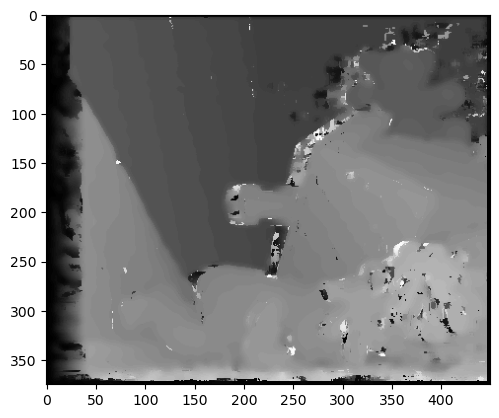

In [39]:
import imageio
scaled_array = np.interp(disp_blurred, (0, 64), (0, 255)).astype(np.uint8)
# scaled_array = disp_blurred
imageio.imwrite('disp_test.png', scaled_array)
plt.imshow(scaled_array, cmap="gray")

In [40]:
!python ../evaldisp.py ../teddy/disp2.png ../teddy/occl.png disp_test.png

(375, 450)
Erreur moyenne des disparités estimées (hors estimations invalides et occultations) = 1.64 px
Pourcentage de disparités dont l'erreur est > à 1 px (y compris erreurs d'occultations) = 28.67 %
Pourcentage de disparités dont l'erreur est > à 2 px (y compris erreurs d'occultations) = 23.00 %


In [71]:
arr = np.where(scaled_array <= 56, 0, scaled_array)
imageio.imwrite('disp_test.png', arr)

In [72]:
!python ../evaldisp.py ../teddy/disp2.png ../teddy/occl.png disp_test.png

(375, 450)
Erreur moyenne des disparités estimées (hors estimations invalides et occultations) = 0.90 px
Pourcentage de disparités dont l'erreur est > à 1 px (y compris erreurs d'occultations) = 18.55 %
Pourcentage de disparités dont l'erreur est > à 2 px (y compris erreurs d'occultations) = 16.58 %


In [42]:
from evaldisp import evaldisp

gt = cv2.imread("../teddy/disp2.png", cv2.IMREAD_GRAYSCALE)
occl = cv2.imread("../teddy/occl.png", cv2.IMREAD_GRAYSCALE)
res = []
for i in range(0, 80, 4):
    arr = np.where(scaled_array <= i, 0, scaled_array)
    err_moy, ps1, ps2 = evaldisp(gt, occl, arr)
    res.append((i, err_moy, ps1, ps2))

In [68]:
import matplotlib.pyplot as plt

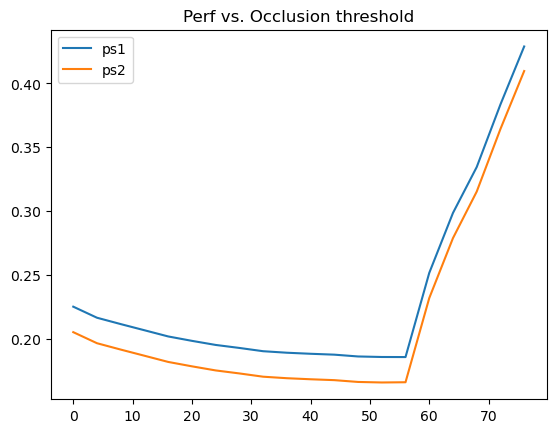

In [70]:
res = np.array(res)
### Create the plot
# plt.plot(res[:,0], res[:,1], label='pixel accuracy')
plt.plot(res[:,0], res[:,2], label='ps1')
plt.plot(res[:,0], res[:,3], label='ps2')
# plt.plot(x, y2, label='Line 2')

# Add title and legend
plt.title('Perf vs. Occlusion threshold')
plt.legend()

# Show the plot
plt.savefig("output/ps1_ps2_occ.pdf")

In [29]:
np.argmin(res[:,2])

14

In [33]:
res[14,0]

56.0

In [57]:
res = []
for i in tqdm(range(1,25,2)):
    for j in range(0,100,5):
        for k in range(0,100,5):
            disp_mode = mode_filter(disp, 11)
            disp_blurred = cv2.bilateralFilter(disp_mode, i, j, k)
            scaled_array = np.interp(disp_blurred, (0, 64), (0, 255)).astype(np.uint8)
            err_moy, ps1, ps2 = evaldisp(gt, occl, scaled_array)
            res.append((i, err_moy, ps1, ps2))

100%|██████████████████████████████████████████| 12/12 [56:16<00:00, 281.34s/it]


In [58]:
res = np.array(res)

np.min(res[:,1])
np.min(res[:,3])

0.18061037037037037

In [52]:
res[:,1]

array([1.55443557, 1.52221608, 1.83764236, ..., 1.88061713, 1.88061374,
       1.88063745])

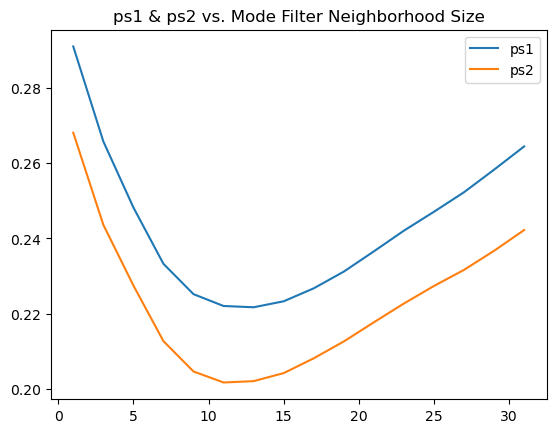

In [49]:
res = np.array(res)
### Create the plot
# plt.plot(res[:,0], res[:,1], label='pixel accuracy')
plt.plot(res[:,0], res[:,2], label='ps1')
plt.plot(res[:,0], res[:,3], label='ps2')
# plt.plot(x, y2, label='Line 2')

# Add title and legend
plt.title('ps1 & ps2 vs. Mode Filter Neighborhood Size')
plt.legend()

# Show the plot
# plt.savefig("output/ps1_ps2_mode.pdf")

In [118]:
res = np.array([[1,13.29],[3, 9.65],[5,3.89], [7,3.13], [9,3.98], [11, 5.49], [13, 6.71], [15, 8.28], [17, 9.29]])

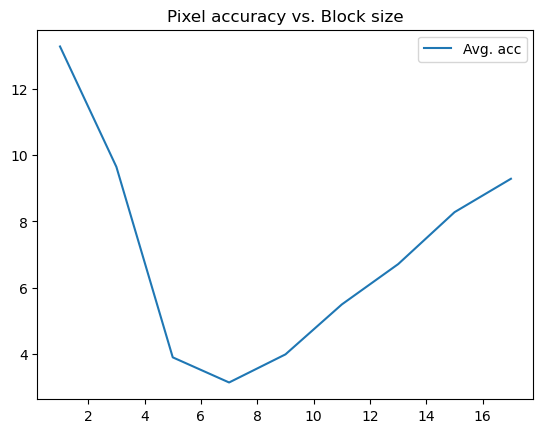

In [122]:
### Create the plot
# plt.plot(res[:,0], res[:,1], label='pixel accuracy')
plt.plot(res[:,0], res[:,1], label='Avg. acc')
# plt.plot(x, y2, label='Line 2')

# Add title and legend
plt.title('Pixel accuracy vs. Block size')
plt.legend()

# Show the plot
plt.savefig("output/block_size.pdf")